**Import working libraries**

In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [46]:
from statsmodels.tsa.arima.model import ARIMA

**Import data**

In [47]:
df = pd.read_csv('/content/covid-data-us-national.txt')

**Make test set (as September's data)**

In [49]:
# Make test set (as September's data)

yf4 = df.iloc[35:39,[5]] 
arr2 = yf4['death_jhu_incidence'].to_numpy()
test = arr2.tolist()

In [50]:
# check test
test

[5838, 5141, 5589, 5208]

**Make train set (as March-Aug data)**

In [54]:
yf3 = df.iloc[9:35,[5]] 
arr = yf3['death_jhu_incidence'].to_numpy()
history = arr.tolist()

In [ ]:
# check train
history # death_jhu_incidence 9 to 35

In [ ]:
y_solution =[]

for t in range(4):
  model2 = ARIMA(history, order=(2,0,2))
  model_fit = model2.fit()
  output = model_fit.forecast()
  y_sol = output[0]

  history.append(y_sol)

  y_solution.append(y_sol)

In [59]:
y_solution

[6582.667627418847, 6954.795852541844, 7549.9310330140015, 8047.124472795227]

**RMSE1_(Test_data)**

In [60]:
pred = np.array(y_solution)
test = np.array(test)
np.sqrt(np.mean((pred-test)**2))

1984.330085840417

**RMSE1 test = 1984.330085840417**

In [62]:
# Now predict back on training data to get first w1 for Q3.3

forecast = model_fit.predict(start=0, end=30)

forecast1 = np.array(forecast)[0:26]
history1 = np.array(history)[0:26]
np.sqrt(np.mean((forecast1-history1)**2))

1859.8348587481062

**RMSE1 = 1859.8348587481062 (on training data)**

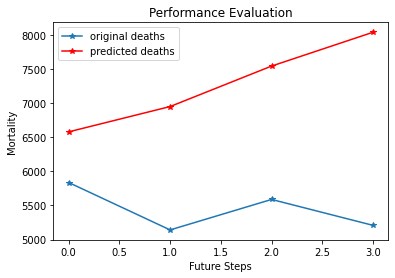

In [63]:
# plot
plt.plot(test, label = 'original deaths', marker = '*')
plt.plot(y_solution, color='red', label = 'predicted deaths', marker = '*')
plt.title('Performance Evaluation')
plt.xlabel('Future Steps')
plt.ylabel('Mortality')
plt.legend()
plt.show()

**Q 3.2**

In [64]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [ ]:
pred_results = [] # store results

Y = df.iloc[9:(35),[5]] # Y-Train set Mar-Aug

for t in range(4): 

  X = df.iloc[9:(35+t),[3,4,6]] # X-Train set Mar-Aug
  X = sm.add_constant(X)
  model = sm.OLS(Y, X)
  results = model.fit()

  pred_x = df.iloc[(35+t):(36+t),[3,4,6]] 
  pred_x = sm.add_constant(pred_x)
  pred_x.insert(0, "const", [1], True)

  ypred = results.predict(pred_x)

  Y.loc[35+t] = [ypred.iloc[0]] # append the training set

  pred_results.append(ypred.iloc[0])  


In [66]:
pred = np.array(pred_results)
test = np.array(test)
np.sqrt(np.mean((pred-test)**2))

1992.0691496084992

**RMSE2 = 1992.0691496084992 (test)**

In [67]:
# Now predict back on training data to get first w2 for Q3.3

X = df.iloc[9:35,[3,4,6]]
X = sm.add_constant(X)
forecast = results.predict(X)

err = 0

for j in range(9,35):
  err += (forecast[j]- Y['death_jhu_incidence'][j])**2

err/(35-9)

np.sqrt(err/(35-9))

2864.671904742172

**RMSE2_training data = 2864.671904742172**

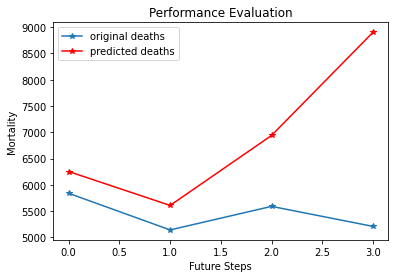

In [ ]:
# plot
plt.plot(test, label = 'original deaths', marker = '*')
plt.plot(pred_results, color='red', label = 'predicted deaths', marker = '*')
plt.title('Performance Evaluation')
plt.xlabel('Future Steps')
plt.ylabel('Mortality')
plt.legend()
plt.show()

In [ ]:
pred_results

[6252.698822856153, 5607.13171410098, 6939.700476685908, 8903.90480410402]

**Q 3.3**

**EM1 (Average ARIMA and OLS)**

In [70]:
yf3 = df.iloc[9:35,[5]] 
arr = yf3['death_jhu_incidence'].to_numpy()
history = arr.tolist()

pred_results = []
y_super = []

Y = df.iloc[9:(35),[5]]

for t in range(4): 

  # OLS
  X = df.iloc[9:(35+t),[3,4,6]]
  X = sm.add_constant(X)
  model = sm.OLS(Y, X)
  results = model.fit()
  pred_x = df.iloc[(35+t):(36+t),[3,4,6]] 
  pred_x = sm.add_constant(pred_x)
  pred_x.insert(0, "const", [1], True)
  ypred = results.predict(pred_x) 
  y_sol1 = ypred.iloc[0] # OLS Solution

  # ARIMA
  model2 = ARIMA(history, order=(2,0,2))
  model_fit = model2.fit()
  output = model_fit.forecast()
  yhat = output[0]
  y_sol2= yhat # ARIMA solution

  y_sol = (y_sol1+ y_sol2)/(2) # Average solution

  # Append y_sol to both ARIMA and OLS
  Y.loc[35+t] = [y_sol]
  history.append(y_sol)

  y_super.append(y_sol) # Update the final solution as well


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [71]:
# Check answer
y_super

[6417.6832251375, 6277.628085943463, 6816.8124997338, 8163.648415663256]

**RMSE EM1 = 1722.7403416342659**

In [72]:
pred = np.array(y_super)
test = np.array(test)
np.sqrt(np.mean((pred-test)**2))

1722.7403416342659

**EM2 (Weighted average ARIMA and OLS)**

In [ ]:
def RMSE_ols(t):
  X = df.iloc[9:(35+t+1),[3,4,6]]
  X = sm.add_constant(X)
  forecast1 = results.predict(X)
  err = 0

  for j in range(9,(35+t+1)):
    err += (forecast1[j]- Y['death_jhu_incidence'][j])**2

  return np.sqrt(err/((35+t+1)-9))

In [ ]:
def RMSE_arima(t):

  forecast = model_fit.predict(start=0, end=29)

  forecast1 = np.array(forecast)[0:(26+t)]
  history1 = np.array(history)[0:(26+t)]
  return np.sqrt(np.mean((forecast1-history1)**2))

In [ ]:
yf3 = df.iloc[9:35,[5]] 
arr = yf3['death_jhu_incidence'].to_numpy()
history = arr.tolist()

# initial rms of training set
rms_ols = 2864.671904742172 # from training set.
rms_arima = 1859.8348587481062 # from training set.


pred_results = []
y_super = []

Y = df.iloc[9:(35),[5]]

for t in range(4): 

  # OLS
  X = df.iloc[9:(35+t),[3,4,6]]
  X = sm.add_constant(X)
  model = sm.OLS(Y, X)
  results = model.fit()
  pred_x = df.iloc[(35+t):(36+t),[3,4,6]] 
  pred_x = sm.add_constant(pred_x)
  pred_x.insert(0, "const", [1], True)
  ypred = results.predict(pred_x)
  
  y_sol1 = ypred.iloc[0] 
  rms1 = (1/rms_ols)

  # ARIMA
  model2 = ARIMA(history, order=(2,0,2))
  model_fit = model2.fit()
  output = model_fit.forecast()
  yhat = output[0]
  y_sol2= yhat
  rms2 = (1/rms_arima)

  y_sol = (rms1*y_sol1+ rms2*y_sol2)/(rms2+rms1) # find the weighted solution

  # Updat the training set with the predicted solution.
  Y.loc[35+t] = [y_sol]
  history.append(y_sol)

  # Append the solution as well
  y_super.append(y_sol)

  # Find the new RMSEs (for the new weights)

  #rms_ols new
  X = df.iloc[9:(35+t+1),[3,4,6]]
  X = sm.add_constant(X)
  forecast1 = results.predict(X)
  err = 0

  for j in range(9,(35+t+1)):
    err += (forecast1[j]- Y['death_jhu_incidence'][j])**2

  rms_ols = np.sqrt(err/((35+t+1)-9))

  #rms_arima new
  forecast = model_fit.predict(start=0, end=29)
  forecast2 = np.array(forecast)[0:(26+t+1)]
  history1 = np.array(history)[0:(26+t+1)]
  rms_arima= np.sqrt(np.mean((forecast2-history1)**2))

  print(rms_ols)
  print(rms_arima)


In [77]:
y_super

[6452.773118690961, 6347.147538303799, 6907.369338613636, 8137.051666489198]

In [78]:
pred = np.array(y_super)
test = np.array(test)
np.sqrt(np.mean((pred-test)**2))

1742.8553618689239

**RMSE EM1 = 1722.7403416342659**

**Final results**

*   RMSE 1 = 1984.330085840417
*   RMSE 2 = 1992.0691496084992
*   RMSE 3 = 1722.7403416342659
*   RMSE 4 = 1742.8553618689239




 

